In [1]:
from generator_based_on_Seattle import *

In [2]:
from parameters import *

In [3]:
generated_traffic_combined = generate_traffic_based_on_seattle(
    from_date=FROM_DATE, 
    to_date=TO_DATE, 
    first_erlang=LAMBDA_0, 
    constant_bitrate=IS_CONSTANT_BITRATE, 
    aggregation=AGGREGATION, 
    resampling=RESAMPLING)

In [4]:
generated_traffic_combined

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.009420,12,0,100,0.009420,0.522604
2,0.027667,13,6,100,0.027667,2.494361
3,0.028379,2,4,100,0.028379,1.556125
4,0.031656,9,10,100,0.031656,0.348921
...,...,...,...,...,...,...
1957006,3651.705032,1,13,100,3651.705032,3651.918584
1957007,3651.705059,2,4,100,3651.705059,3652.332977
1957008,3651.706026,5,1,100,3651.706026,3651.764866
1957009,3651.707197,3,10,100,3651.707197,3652.172645


In [5]:
generated_traffic = divide_generated_traffic_into_periods(generated_traffic_combined,UPGRADE_PERIOD)

In [6]:
generated_traffic[0]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.009420,12,0,100,0.009420,0.522604
2,0.027667,13,6,100,0.027667,2.494361
3,0.028379,2,4,100,0.028379,1.556125
4,0.031656,9,10,100,0.031656,0.348921
...,...,...,...,...,...,...
9203,89.976702,13,1,100,89.976702,90.646959
9204,89.977222,3,10,100,89.977222,90.921168
9205,89.982801,11,3,100,89.982801,90.284513
9206,89.991002,12,9,100,89.991002,95.361305


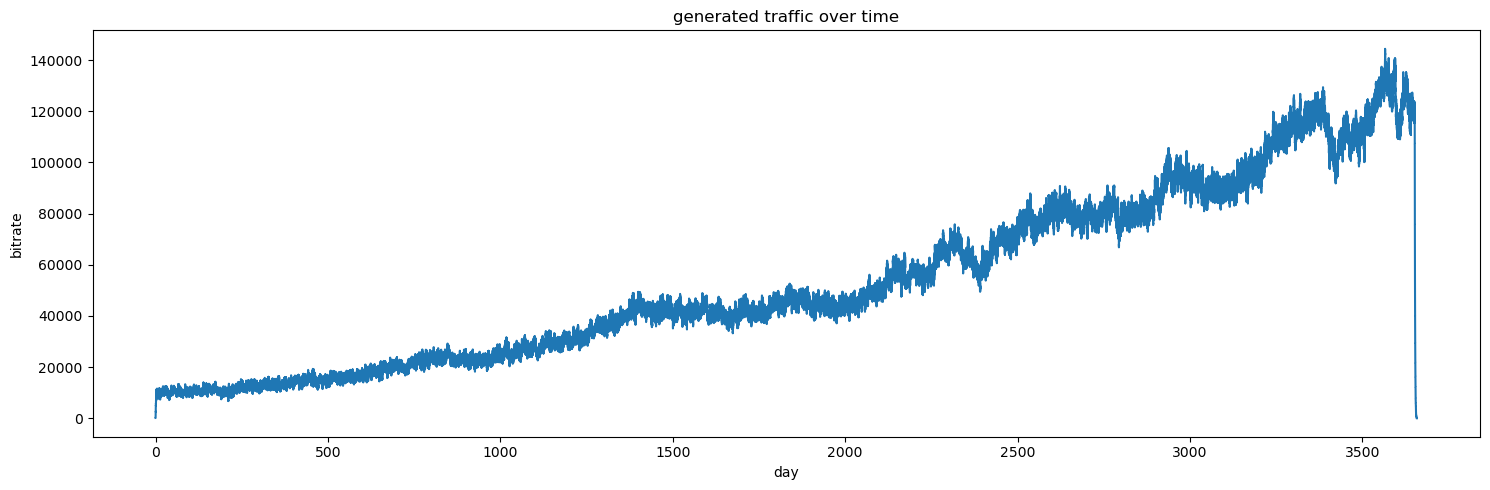

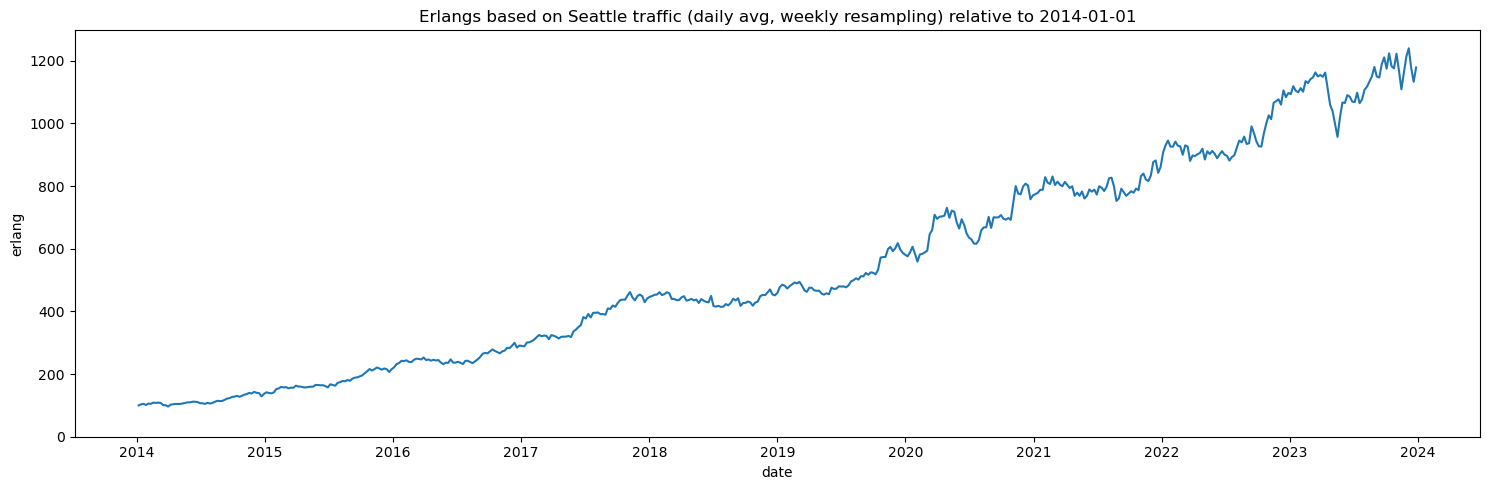

In [7]:
draw_generated_traffic(generated_traffic_combined)
draw_erlangs_from_Seattle(
    from_date=FROM_DATE, 
    to_date=TO_DATE, 
    first_erlang=LAMBDA_0, 
    aggregation=AGGREGATION, 
    resampling=RESAMPLING)

In [8]:
predicted_traffic = perdict_traffic(generated_traffic_combined, constant_bitrate=IS_CONSTANT_BITRATE, period_length=UPGRADE_PERIOD, alpha=ALPHA_PERCENT)

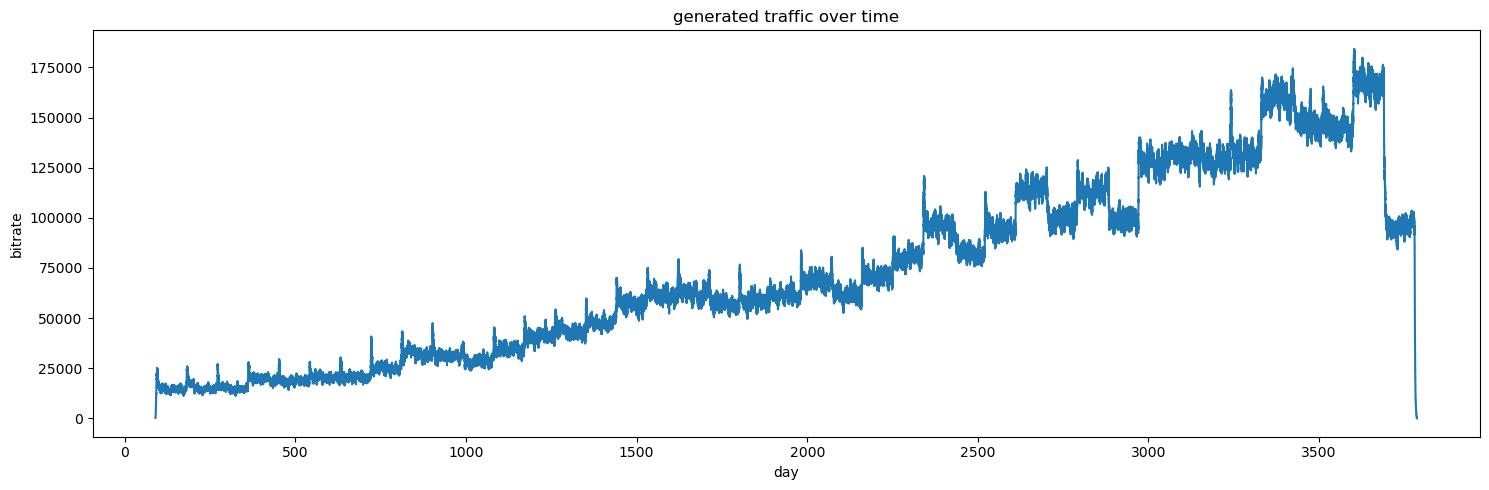

In [9]:
draw_generated_traffic(pd.concat(predicted_traffic))

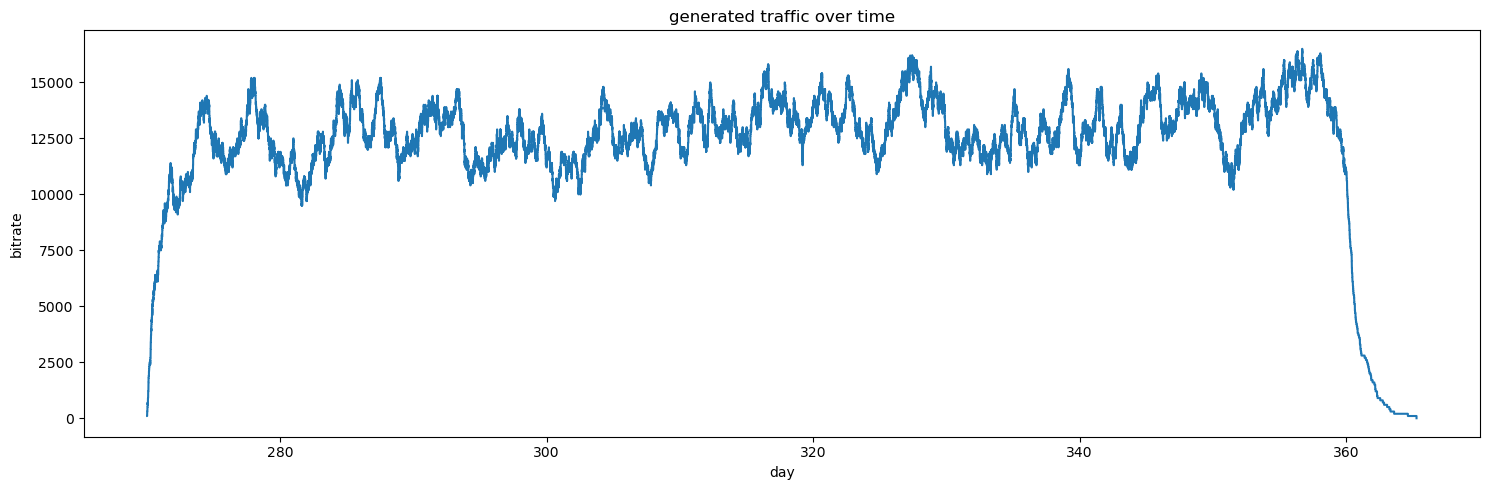

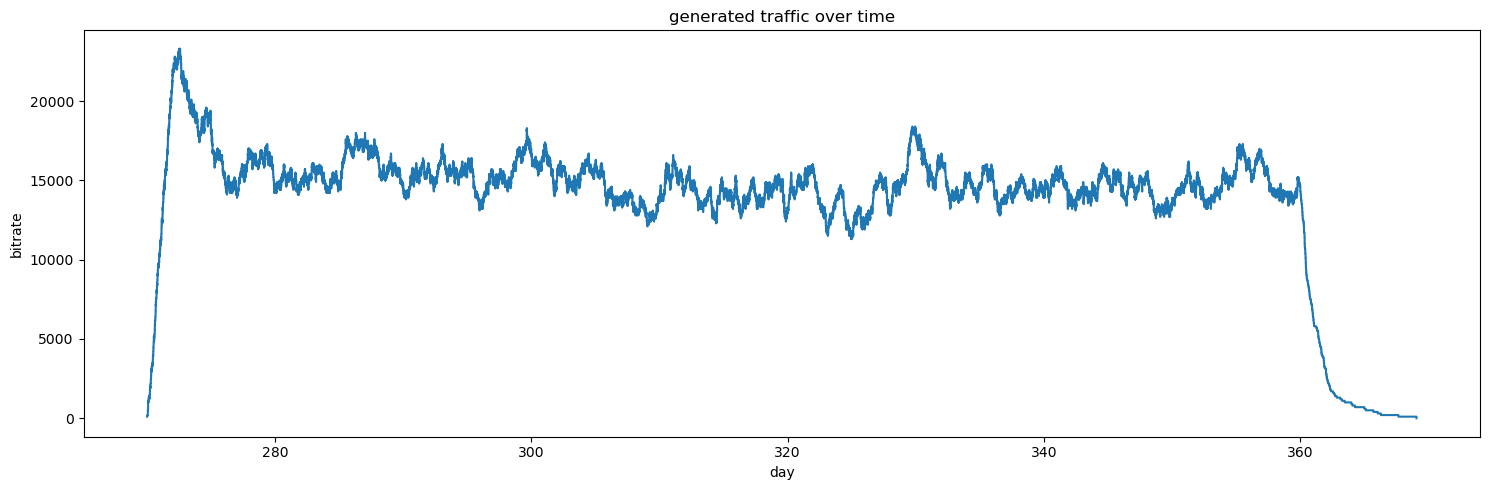

In [10]:
draw_generated_traffic(divide_generated_traffic_into_periods(generated_traffic_combined,UPGRADE_PERIOD)[3])
draw_generated_traffic(predicted_traffic[2])

In [11]:
type(generated_traffic)

list

In [12]:
type(generated_traffic[0])

pandas.core.frame.DataFrame

In [21]:
len(generated_traffic)

41

In [13]:
type(predicted_traffic)

list

In [14]:
type(predicted_traffic[0])

pandas.core.frame.DataFrame

In [15]:
len(predicted_traffic)

41

In [34]:
generated_traffic[40].iloc[len(generated_traffic)]

current_global_time    3600.039575
source_id                 4.000000
destination_id            9.000000
datarate                100.000000
arrival_time           3600.039575
departure_time         3601.303097
Name: 1894457, dtype: float64

In [32]:
generated_traffic[40]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
1894416,3600.001337,2,5,100,3600.001337,3600.625871
1894417,3600.001618,0,10,100,3600.001618,3602.878672
1894418,3600.001983,3,2,100,3600.001983,3600.387461
1894419,3600.003086,12,5,100,3600.003086,3602.691525
1894420,3600.003320,4,8,100,3600.003320,3602.044469
...,...,...,...,...,...,...
1957006,3651.705032,1,13,100,3651.705032,3651.918584
1957007,3651.705059,2,4,100,3651.705059,3652.332977
1957008,3651.706026,5,1,100,3651.706026,3651.764866
1957009,3651.707197,3,10,100,3651.707197,3652.172645


In [20]:
predicted_traffic[0].iloc[len(predicted_traffic)]

current_global_time     90.565525
source_id               10.000000
destination_id           3.000000
datarate               100.000000
arrival_time            90.565525
departure_time          90.847645
Name: 41, dtype: float64